# Functions of DataFrame 4

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [7]:
df=DataFrame({'a':['a1','a1','a2','a2','a3','a3'],
           'b':['b1','b1','b1','b1','b2',np.nan],
           'c':[1,1,3,4,4,4]})
print(df)

    a    b  c
0  a1   b1  1
1  a1   b1  1
2  a2   b1  3
3  a2   b1  4
4  a3   b2  4
5  a3  NaN  4


**unique()**

In [3]:
print(df['a'].unique())

['a1' 'a2' 'a3']


In [5]:
print(df['b'].unique())

['b1' 'b2' nan]


In [6]:
print(df['c'].unique())

[1 3 4]


**value_counts()**

In [8]:
print(df['a'].value_counts())

a2    2
a3    2
a1    2
Name: a, dtype: int64


In [9]:
print(df['b'].value_counts())

b1    4
b2    1
Name: b, dtype: int64


In [10]:
print(df['c'].value_counts())

4    3
1    2
3    1
Name: c, dtype: int64


In [11]:
print(df['c'].value_counts(normalize=True))

4    0.500000
1    0.333333
3    0.166667
Name: c, dtype: float64


In [12]:
print(df['c'].value_counts(sort=True, ascending=False))

4    3
1    2
3    1
Name: c, dtype: int64


In [14]:
print(df['c'].value_counts(sort=True, ascending=True))

3    1
1    2
4    3
Name: c, dtype: int64


In [16]:
print(df['c'].value_counts(sort=False))

1    2
3    1
4    3
Name: c, dtype: int64


In [17]:
print(df['b'].value_counts(dropna=False))

b1     4
b2     1
NaN    1
Name: b, dtype: int64


In [18]:
print(df['c'].value_counts(bins=[0,1,2,3,4,5], sort=False))

(-0.001, 1.0]    2
(1.0, 2.0]       0
(2.0, 3.0]       1
(3.0, 4.0]       3
(4.0, 5.0]       0
Name: c, dtype: int64


 **표준화 : Z=(X-mean)/std**

In [20]:
from numpy import *

In [21]:
data=np.random.randint(30, size=(6,5))
print(data)

[[15 21 20  7 22]
 [ 1 16 18 13  3]
 [11 25 11  1  1]
 [28  2 15 13  4]
 [17 26 23  4 20]
 [28  7 19 23 12]]


In [23]:
print((data-mean(data,axis=0))/std(data,axis=0))

[[-0.17611749  0.53879524  0.61159284 -0.43855237  1.40563383]
 [-1.65550439 -0.01857915  0.08737041  0.39238896 -0.88354126]
 [-0.59879946  0.98469475 -1.74740811 -1.26949371 -1.12450706]
 [ 1.19759892 -1.57922743 -0.69896325  0.39238896 -0.76305836]
 [ 0.0352235   1.09616963  1.39792649 -0.85402304  1.16466803]
 [ 1.19759892 -1.02185304  0.34948162  1.77729119  0.20080483]]


===========================================

In [24]:
import scipy.stats as ss

In [25]:
data_standardised_ss=ss.zscore(data)
print(data_standardised_ss)

[[-0.17611749  0.53879524  0.61159284 -0.43855237  1.40563383]
 [-1.65550439 -0.01857915  0.08737041  0.39238896 -0.88354126]
 [-0.59879946  0.98469475 -1.74740811 -1.26949371 -1.12450706]
 [ 1.19759892 -1.57922743 -0.69896325  0.39238896 -0.76305836]
 [ 0.0352235   1.09616963  1.39792649 -0.85402304  1.16466803]
 [ 1.19759892 -1.02185304  0.34948162  1.77729119  0.20080483]]


===========================================

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
ds=StandardScaler().fit_transform(data)
print(ds)

[[-0.17611749  0.53879524  0.61159284 -0.43855237  1.40563383]
 [-1.65550439 -0.01857915  0.08737041  0.39238896 -0.88354126]
 [-0.59879946  0.98469475 -1.74740811 -1.26949371 -1.12450706]
 [ 1.19759892 -1.57922743 -0.69896325  0.39238896 -0.76305836]
 [ 0.0352235   1.09616963  1.39792649 -0.85402304  1.16466803]
 [ 1.19759892 -1.02185304  0.34948162  1.77729119  0.20080483]]


C:\Users\403-6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


===========================================

In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [30]:
np.random.seed(777)
mu, sigma = 10,2
x=mu+sigma*np.random.randn(100)
print(x)

[ 9.06358241  8.35435029  9.8692398   8.57327615 11.81270177 11.53247346
 11.65210814  7.35263443  6.49511095 12.00489814 11.08961891 13.79032181
  8.46128509  7.19380816  8.73506499  8.88225266  7.53353723  9.12099296
 11.82957452 10.53008186  7.2332597  11.37102361 10.91218183  9.07725147
 10.18940061  6.91437679 14.9587392  10.91373352  9.37225444 10.04207476
 11.92158632 10.11696579  9.10793566 10.63839428 11.68233725  6.93447601
  9.43683148 13.48890542  8.65152218 11.17680246 13.60872693 14.11250052
 12.90916337  9.72317662 10.68574377  8.54476304  7.1921078   7.51877762
  9.11303567  9.90534968 11.51536872  9.69582815  9.45744199  8.80032005
  5.94619175 10.66068481  9.338338    9.93011567 10.57949608  8.7874601
  9.46319145 12.38295504 10.31522662 12.34964951 12.64182004  8.30392543
 11.49141479  9.3767574   7.89786923  7.84700635 10.90121931 10.81748164
  7.14091696 12.03485442  9.83645853  9.23216313  9.52354965 10.01757724
 11.04093677 10.80740904  9.19643565  8.60550947 11.

In [31]:
print(np.mean(x))

10.014107058424933


In [32]:
print(np.std(x))

1.9171489776981916


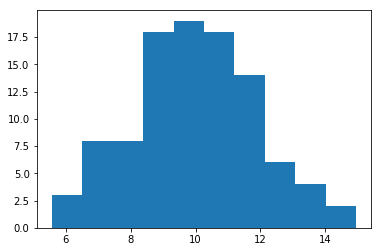

In [33]:
plt.hist(x)
plt.show()

===========================================

In [34]:
x[98:100]=100
print(x)

[  9.06358241   8.35435029   9.8692398    8.57327615  11.81270177
  11.53247346  11.65210814   7.35263443   6.49511095  12.00489814
  11.08961891  13.79032181   8.46128509   7.19380816   8.73506499
   8.88225266   7.53353723   9.12099296  11.82957452  10.53008186
   7.2332597   11.37102361  10.91218183   9.07725147  10.18940061
   6.91437679  14.9587392   10.91373352   9.37225444  10.04207476
  11.92158632  10.11696579   9.10793566  10.63839428  11.68233725
   6.93447601   9.43683148  13.48890542   8.65152218  11.17680246
  13.60872693  14.11250052  12.90916337   9.72317662  10.68574377
   8.54476304   7.1921078    7.51877762   9.11303567   9.90534968
  11.51536872   9.69582815   9.45744199   8.80032005   5.94619175
  10.66068481   9.338338     9.93011567  10.57949608   8.7874601
   9.46319145  12.38295504  10.31522662  12.34964951  12.64182004
   8.30392543  11.49141479   9.3767574    7.89786923   7.84700635
  10.90121931  10.81748164   7.14091696  12.03485442   9.83645853
   9.232163

In [35]:
print(np.mean(x))

11.79720227993895


In [36]:
print(np.std(x))

12.741059695068776


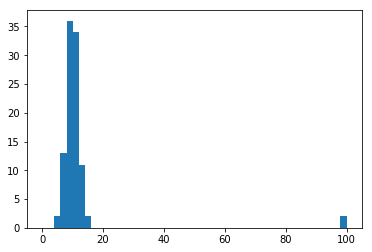

In [37]:
plt.hist(x,bins=np.arange(0,102,2))
plt.show()

In [52]:
x=x.reshape(-1,1)
print(x.shape)
print(x[-10:])

(100, 1)
[[ 12.82260161]
 [  9.74696455]
 [ 11.10631468]
 [  8.36892803]
 [ 11.07740504]
 [  5.56441007]
 [  8.18741563]
 [  7.07575024]
 [100.        ]
 [100.        ]]


In [53]:
xss=StandardScaler().fit_transform(x)
print(xss[-10:])

[[ 0.08047991]
 [-0.16091579]
 [-0.05422529]
 [-0.26907293]
 [-0.0564943 ]
 [-0.48918947]
 [-0.28331918]
 [-0.37056981]
 [ 6.9227207 ]
 [ 6.9227207 ]]


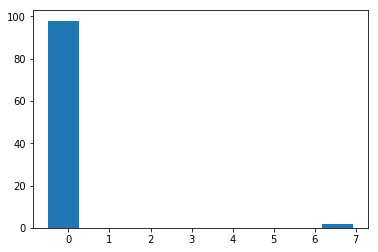

In [42]:
plt.hist(xss)
plt.show()

===========================================

In [43]:
xss_in=xss[xss<5]
print(xss_in)

[-0.214552   -0.27021708 -0.15131885 -0.25303438  0.0012165  -0.02077761
 -0.01138792 -0.34883816 -0.4161421   0.0163013  -0.05553568  0.15643279
 -0.26182416 -0.36130387 -0.24033615 -0.22878392 -0.33463975 -0.21004605
  0.00254078 -0.09945173 -0.35820746 -0.03344923 -0.06946208 -0.21347917
 -0.12619058 -0.38323543  0.24813767 -0.06934029 -0.19032544 -0.13775365
  0.00976246 -0.13187573 -0.21107087 -0.09095068 -0.00901534 -0.38165791
 -0.18525702  0.1327757  -0.24689313 -0.04869295  0.14218006  0.18171944
  0.08727383 -0.16278282 -0.08723439 -0.25527227 -0.36143732 -0.33579818
 -0.21067059 -0.14848471 -0.0221201  -0.16492931 -0.18363938 -0.23521452
 -0.4592248  -0.08920117 -0.19298742 -0.14654092 -0.09557338 -0.23622385
 -0.18318812  0.04597363 -0.11631495  0.0433596   0.06629101 -0.27417475
 -0.02400016 -0.18997202 -0.30604464 -0.31003669 -0.07032248 -0.07689475
 -0.36545511  0.01865246 -0.15389173 -0.20132071 -0.17845083 -0.13967638
 -0.05935656 -0.07768532 -0.20412483 -0.2505045  -0

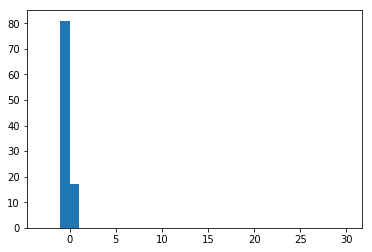

In [44]:
plt.hist(xss_in,bins=np.arange(-3,30.2))
plt.show()

In [45]:
print(np.median(x))

9.917732674869148


In [46]:
print(np.mean(x))

11.79720227993895


In [48]:
Q1=np.percentile(x,25,axis=0)
Q3=np.percentile(x,75,axis=0)
IQR=Q3-Q1
print("1사분위수 : ",Q1)
print("3사분위수 : ",Q3)
print("IQR : ",IQR)

1사분위수 :  [8.77436132]
3사분위수 :  [11.39649887]
IQR :  [2.62213754]


==========================================

In [51]:
x_rs=RobustScaler().fit_transform(x)
print(x_rs[-10:])

[[ 1.10782477]
 [-0.06512554]
 [ 0.45328744]
 [-0.59066491]
 [ 0.44226222]
 [-1.66021901]
 [-0.65988798]
 [-1.08384186]
 [34.35451645]
 [34.35451645]]


In [54]:
print(np.median(x_rs))

0.0


In [55]:
print(np.mean(x_rs))

0.7167700301529704


In [56]:
print(np.std(x_rs))

4.859035611526193


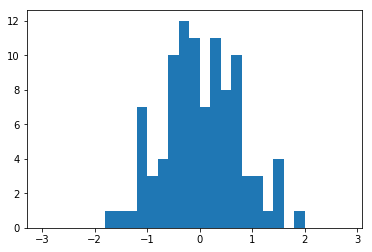

In [59]:
x_rs_in=x_rs[x_rs<5]
plt.hist(x_rs_in,bins=np.arange(-3,3,0.2))
plt.show()